Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


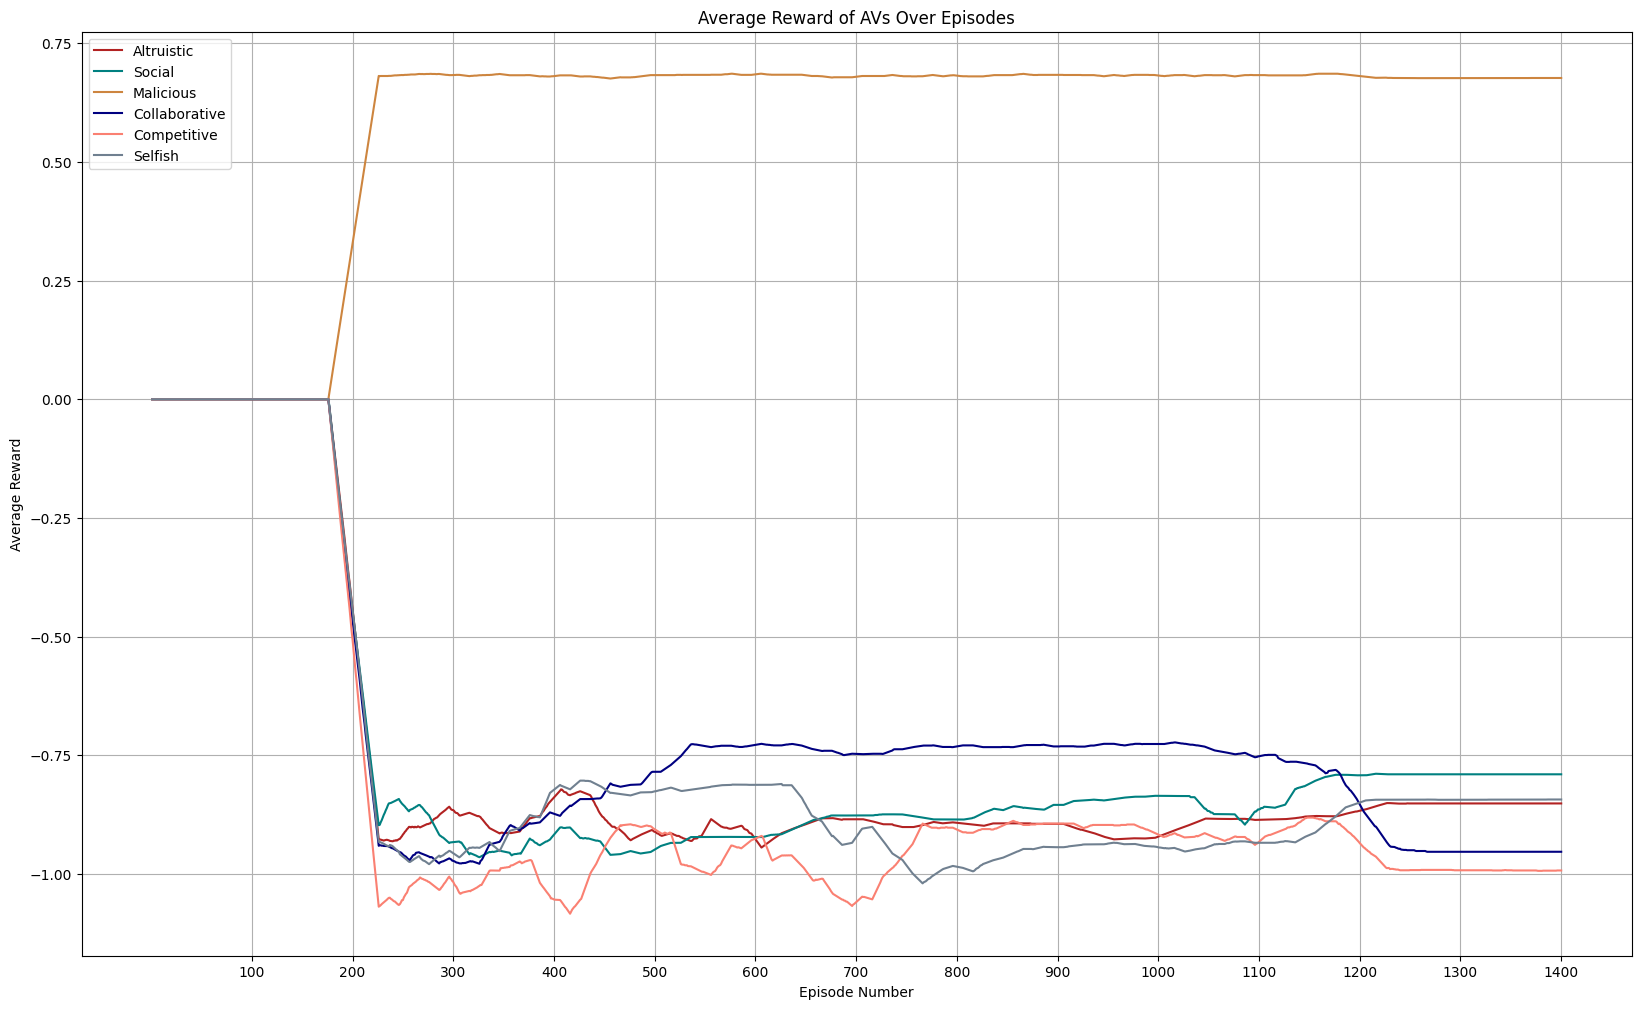

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np


folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV rows
        av_df = df[df['kind'] == 'AV']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time = av_df['reward'].mean()
        avg_travel_times.append(avg_travel_time)

    ## Transform NaN values to zero
    array_with_nans = np.array(avg_travel_times)
    array_without_nans = np.nan_to_num(array_with_nans, nan=0)

    # Convert back to list if needed
    avg_travel_times = array_without_nans.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times = uniform_filter1d(avg_travel_times, size=50)

    # Plot the results for the current folder on the same figure
    plt.plot(episodes, avg_travel_times, linestyle='-', color=color, label=legend_name)  # Apply color and label

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward of AVs Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder
plt.legend()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


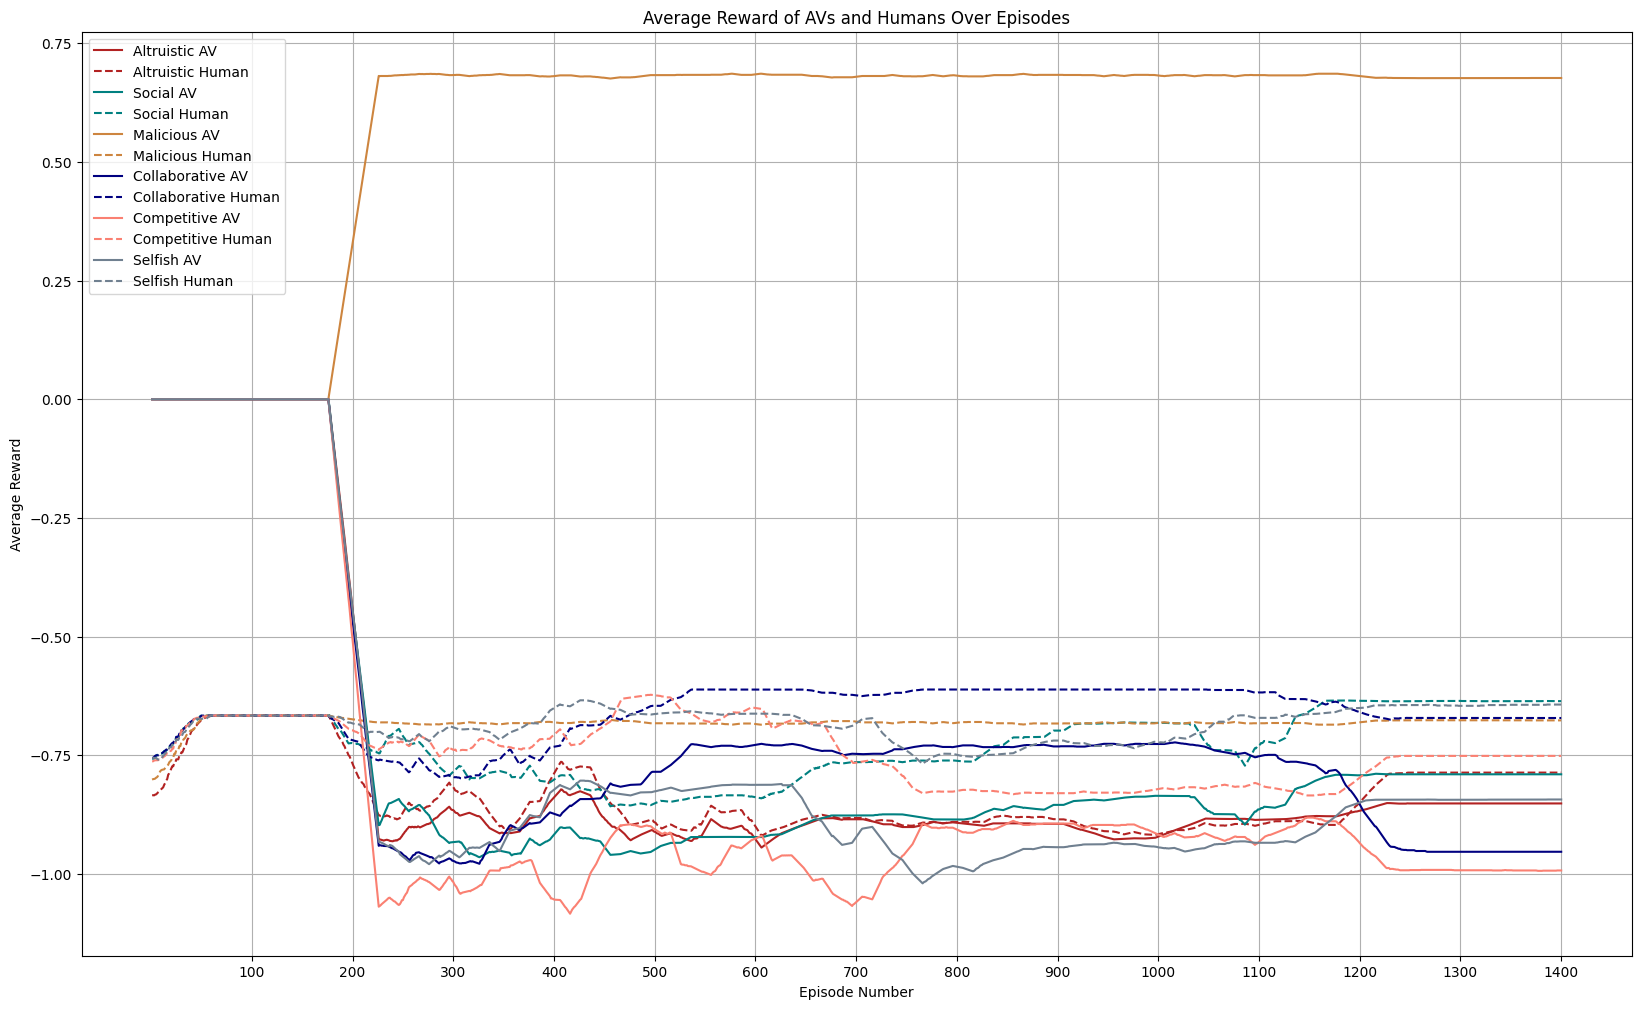

In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure
plt.figure(figsize=(20, 12))

# Iterate through all folder paths with corresponding colors
for folder_path, legend_name, color in zip(folder_paths, legend, colors):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times_av = []
    avg_travel_times_human = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time_av = av_df['reward'].mean()
        avg_travel_times_av.append(avg_travel_time_av)

        # Calculate the average travel time for Human entries (reward in your case)
        avg_travel_time_human = human_df['reward'].mean()
        avg_travel_times_human.append(avg_travel_time_human)

    ## Transform NaN values to zero
    array_with_nans_av = np.array(avg_travel_times_av)
    array_without_nans_av = np.nan_to_num(array_with_nans_av, nan=0)

    array_with_nans_human = np.array(avg_travel_times_human)
    array_without_nans_human = np.nan_to_num(array_with_nans_human, nan=0)

    # Convert back to list if needed
    avg_travel_times_av = array_without_nans_av.tolist()
    avg_travel_times_human = array_without_nans_human.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times_av = uniform_filter1d(avg_travel_times_av, size=50)
    avg_travel_times_human = uniform_filter1d(avg_travel_times_human, size=50)

    # Plot the results for the current folder on the same figure for both AV and Human
    plt.plot(episodes, avg_travel_times_av, linestyle='-', color=color, label=f'{legend_name} AV')  # Apply color and label for AV
    plt.plot(episodes, avg_travel_times_human, linestyle='--', color=color, label=f'{legend_name} Human')  # Apply dashed line and same color for Human

# Customize the plot
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward of AVs and Humans Over Episodes')
plt.grid(True)

# Set x-ticks to show every 100 episodes
if episodes:
    plt.xticks([ep for ep in episodes if ep % 100 == 0])

# Show legend to differentiate between lines for each folder and agent type
plt.legend()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


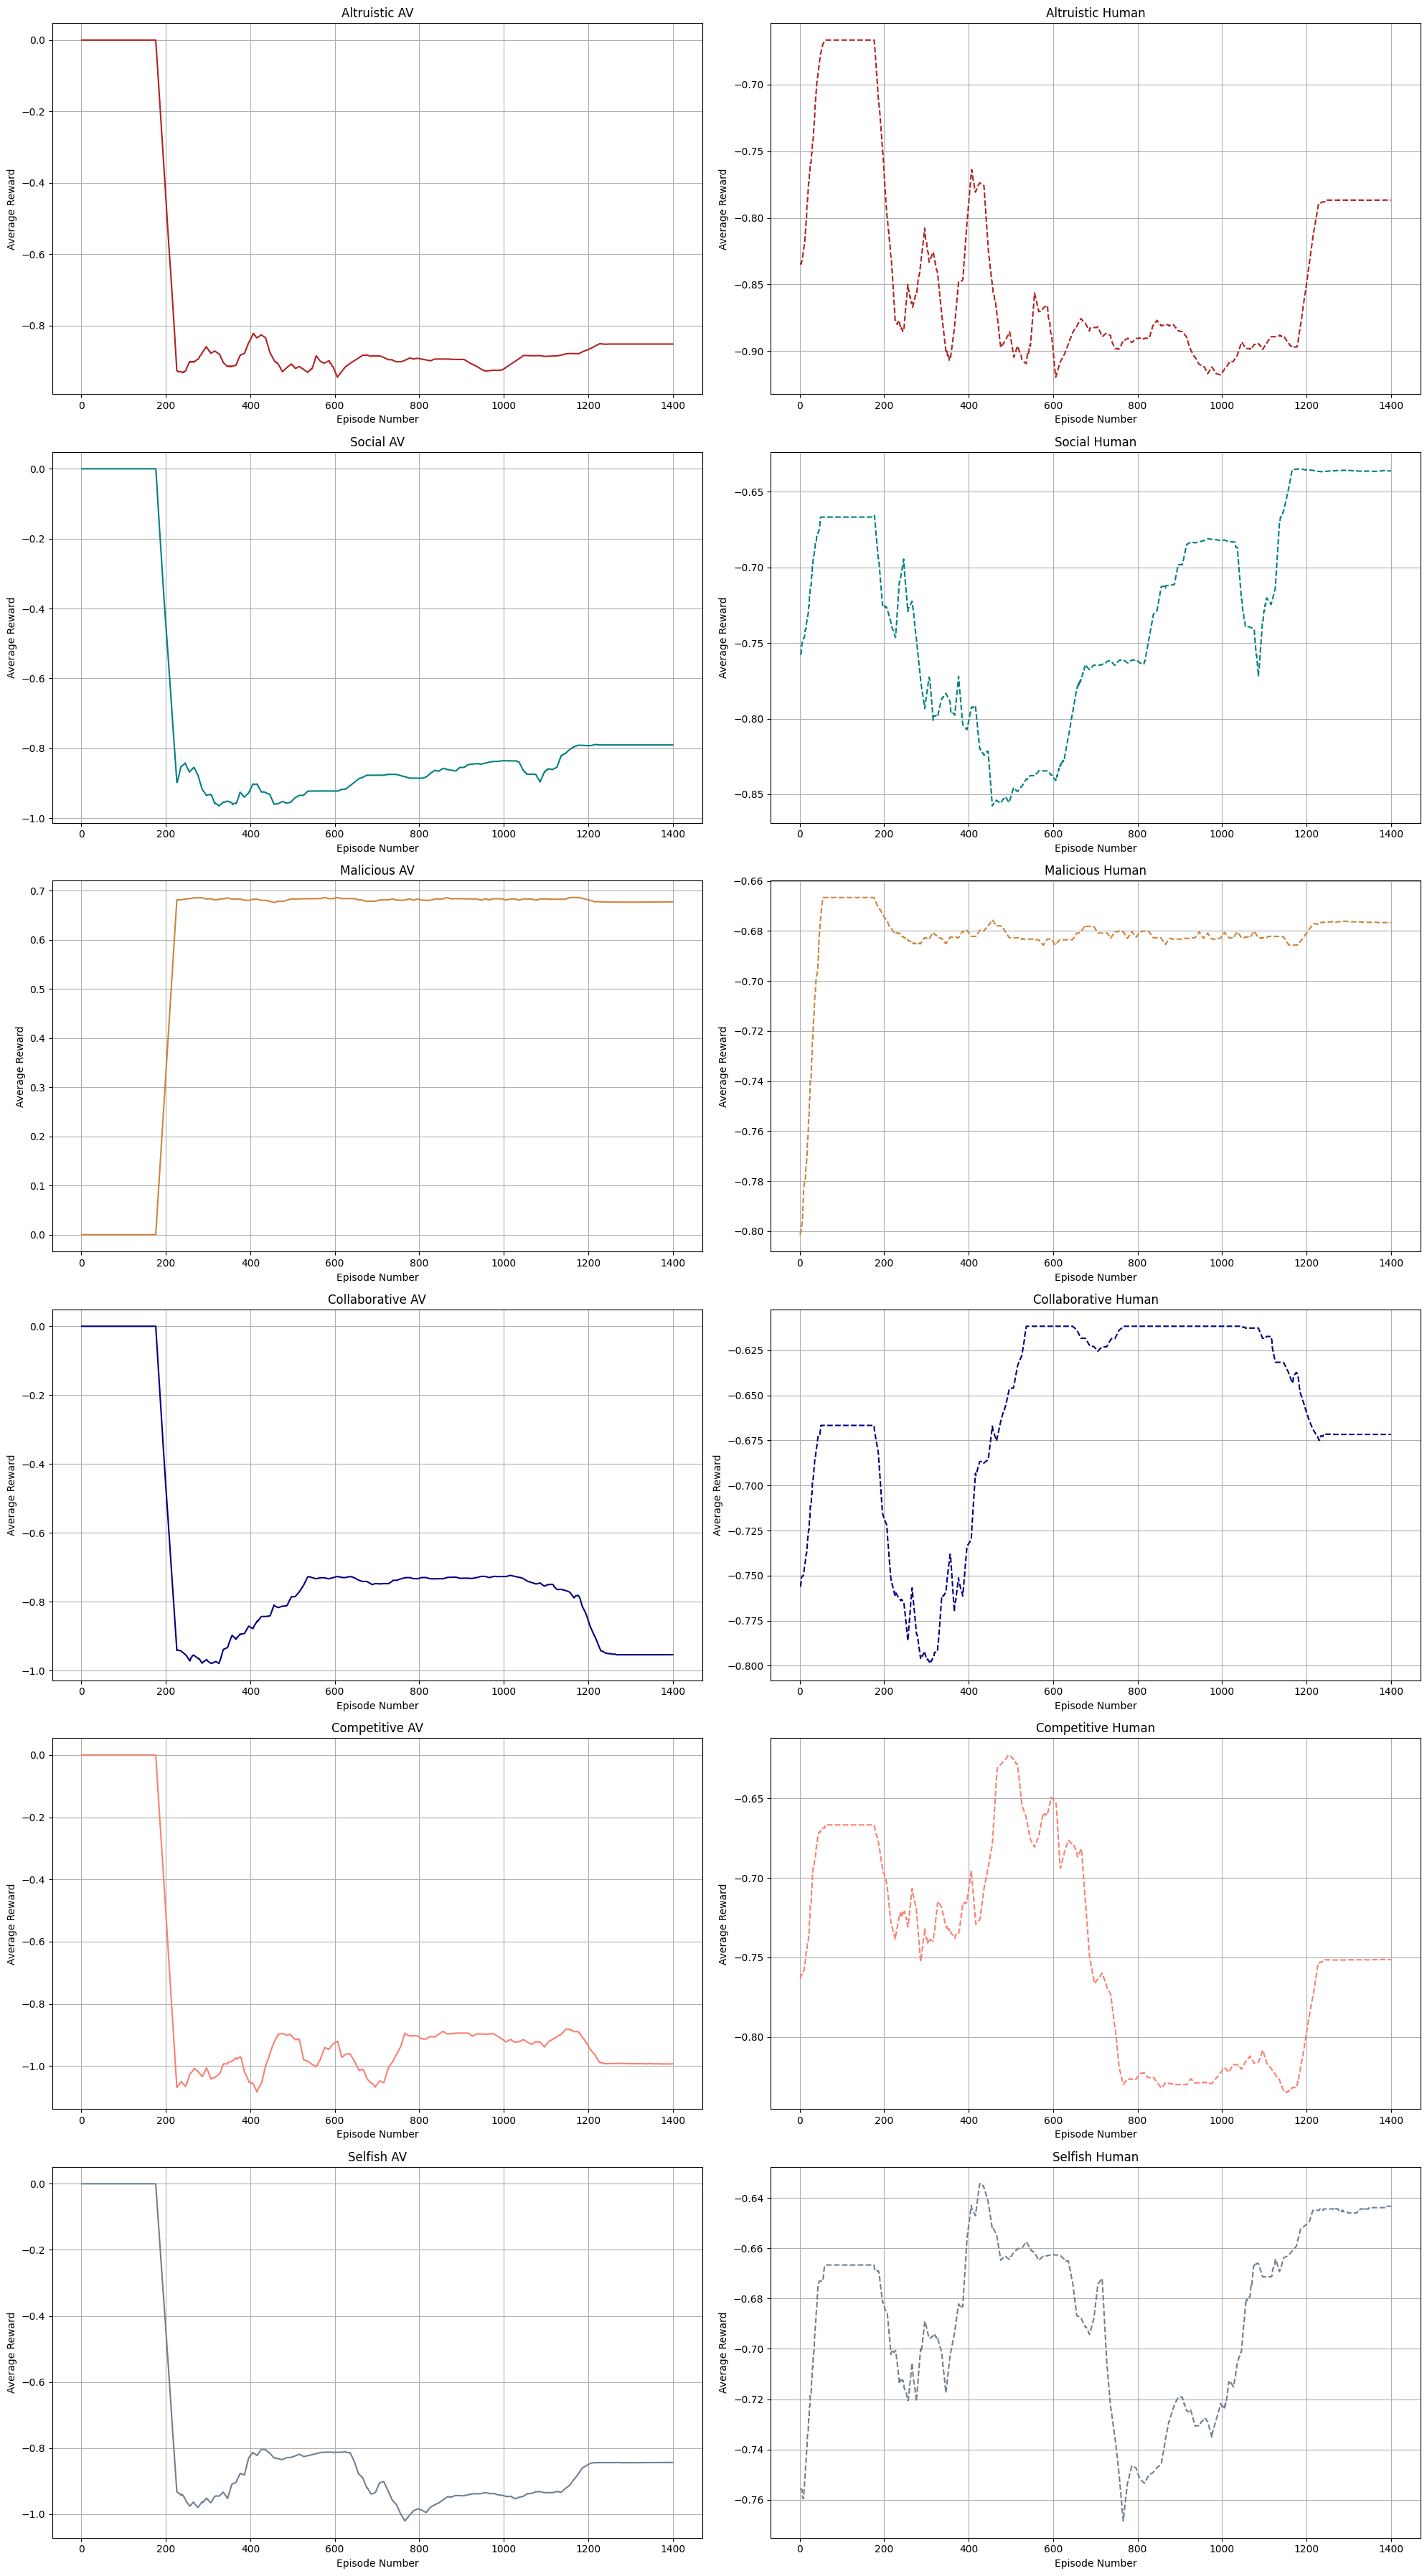

In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a figure with subplots for each folder (2 subplots for each behavior: AV and Human)
fig, axs = plt.subplots(len(folder_paths), 2, figsize=(20, len(folder_paths) * 6))  # 2 columns (one for AV, one for Human)

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name, color) in enumerate(zip(folder_paths, legend, colors)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times_av = []
    avg_travel_times_human = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time_av = av_df['reward'].mean()
        avg_travel_times_av.append(avg_travel_time_av)

        # Calculate the average travel time for Human entries (reward in your case)
        avg_travel_time_human = human_df['reward'].mean()
        avg_travel_times_human.append(avg_travel_time_human)

    ## Transform NaN values to zero
    array_with_nans_av = np.array(avg_travel_times_av)
    array_without_nans_av = np.nan_to_num(array_with_nans_av, nan=0)

    array_with_nans_human = np.array(avg_travel_times_human)
    array_without_nans_human = np.nan_to_num(array_with_nans_human, nan=0)

    # Convert back to list if needed
    avg_travel_times_av = array_without_nans_av.tolist()
    avg_travel_times_human = array_without_nans_human.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times_av = uniform_filter1d(avg_travel_times_av, size=50)
    avg_travel_times_human = uniform_filter1d(avg_travel_times_human, size=50)

    # Plot the results for AVs in the left subplot (column 0)
    axs[i, 0].plot(episodes, avg_travel_times_av, linestyle='-', color=color, label=f'{legend_name} AV')
    axs[i, 0].set_title(f'{legend_name} AV')
    axs[i, 0].set_xlabel('Episode Number')
    axs[i, 0].set_ylabel('Average Reward')
    axs[i, 0].grid(True)

    # Plot the results for Humans in the right subplot (column 1)
    axs[i, 1].plot(episodes, avg_travel_times_human, linestyle='--', color=color, label=f'{legend_name} Human')
    axs[i, 1].set_title(f'{legend_name} Human')
    axs[i, 1].set_xlabel('Episode Number')
    axs[i, 1].set_ylabel('Average Reward')
    axs[i, 1].grid(True)

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


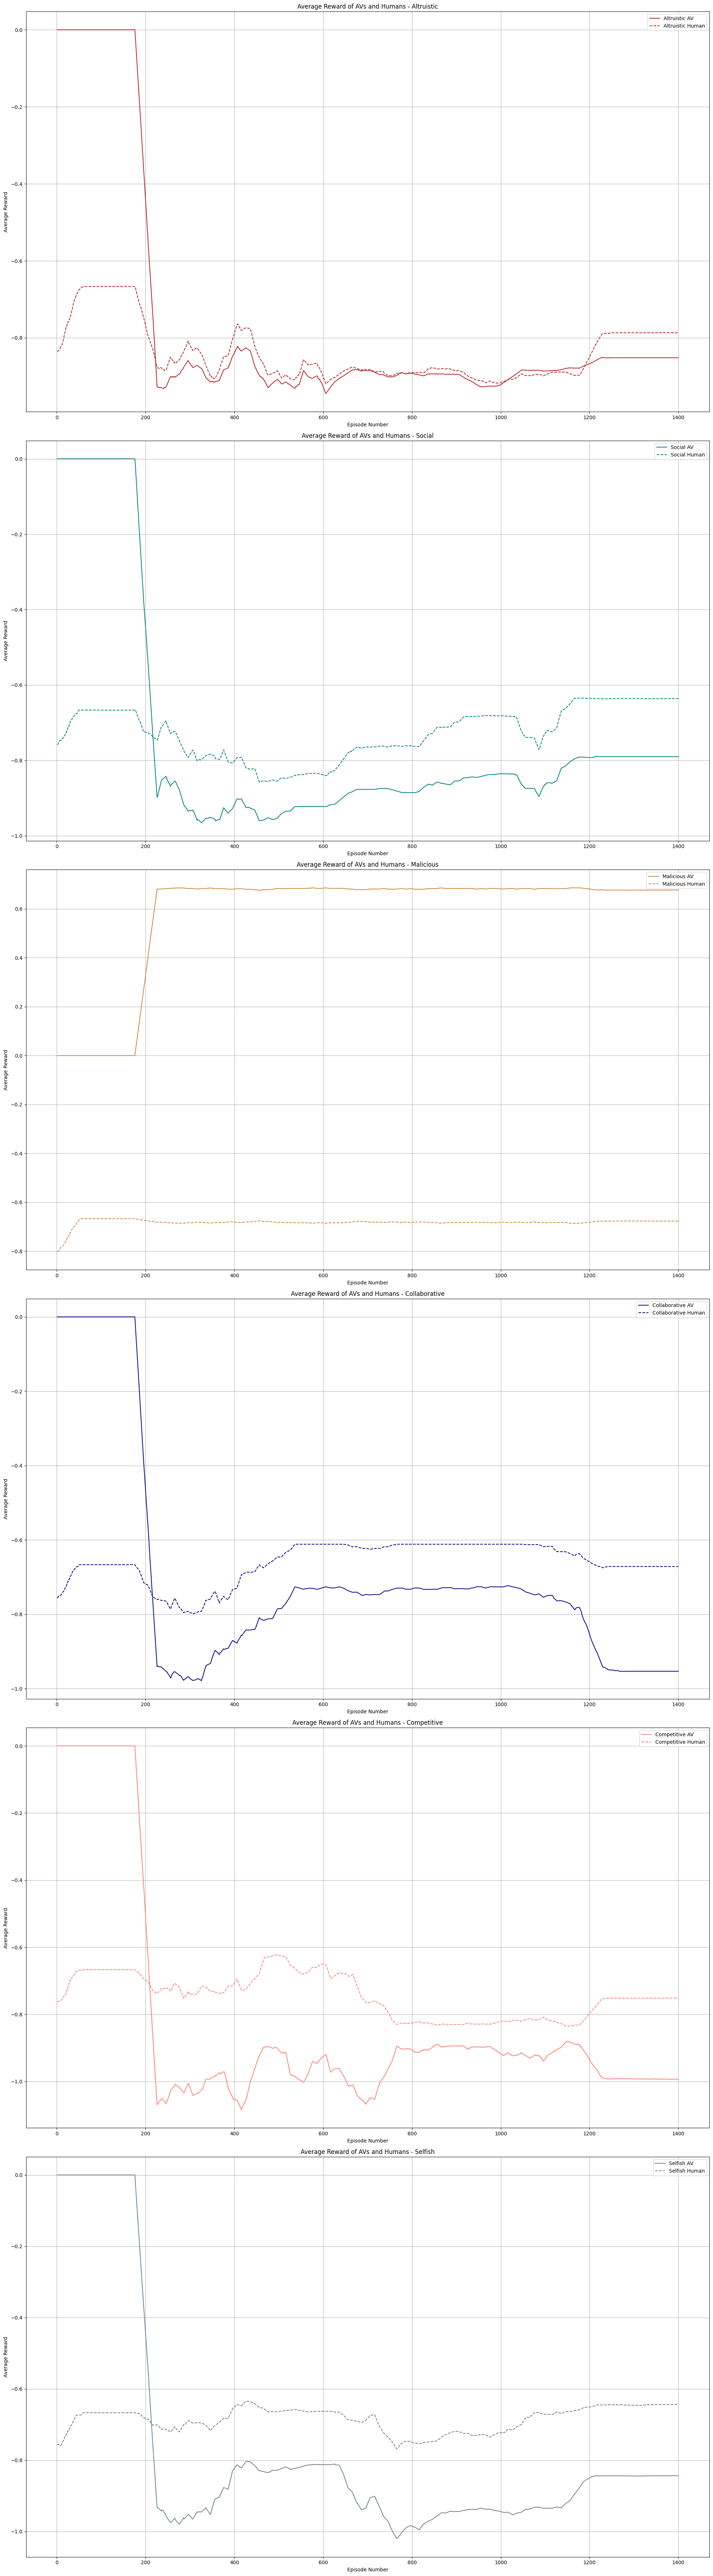

In [4]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot
colors = ["firebrick", "teal", "peru", "navy", "salmon", "slategray"]

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure for each folder (one plot for AV and Human together)
plt.figure(figsize=(20, 12 * len(folder_paths)))  # Set height proportional to the number of folders

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name, color) in enumerate(zip(folder_paths, legend, colors)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and average travel times
    episodes = []
    avg_travel_times_av = []
    avg_travel_times_human = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Calculate the average travel time for AV entries (reward in your case)
        avg_travel_time_av = av_df['reward'].mean()
        avg_travel_times_av.append(avg_travel_time_av)

        # Calculate the average travel time for Human entries (reward in your case)
        avg_travel_time_human = human_df['reward'].mean()
        avg_travel_times_human.append(avg_travel_time_human)

    ## Transform NaN values to zero
    array_with_nans_av = np.array(avg_travel_times_av)
    array_without_nans_av = np.nan_to_num(array_with_nans_av, nan=0)

    array_with_nans_human = np.array(avg_travel_times_human)
    array_without_nans_human = np.nan_to_num(array_with_nans_human, nan=0)

    # Convert back to list if needed
    avg_travel_times_av = array_without_nans_av.tolist()
    avg_travel_times_human = array_without_nans_human.tolist()

    # Smooth the average travel times using uniform_filter1d
    avg_travel_times_av = uniform_filter1d(avg_travel_times_av, size=50)
    avg_travel_times_human = uniform_filter1d(avg_travel_times_human, size=50)

    # Create a subplot for each folder (i.e., each behavior type)
    plt.subplot(len(folder_paths), 1, i + 1)
    
    # Plot the results for both AVs and Humans on the same plot
    plt.plot(episodes, avg_travel_times_av, linestyle='-', color=color, label=f'{legend_name} AV')  # Solid line for AVs
    plt.plot(episodes, avg_travel_times_human, linestyle='--', color=color, label=f'{legend_name} Human')  # Dashed line for Humans
    
    # Customize the plot for each subplot
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward')
    plt.title(f'Average Reward of AVs and Humans - {legend_name}')
    plt.grid(True)
    
    # Show legend for the subplot to differentiate AVs and Humans
    plt.legend()

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


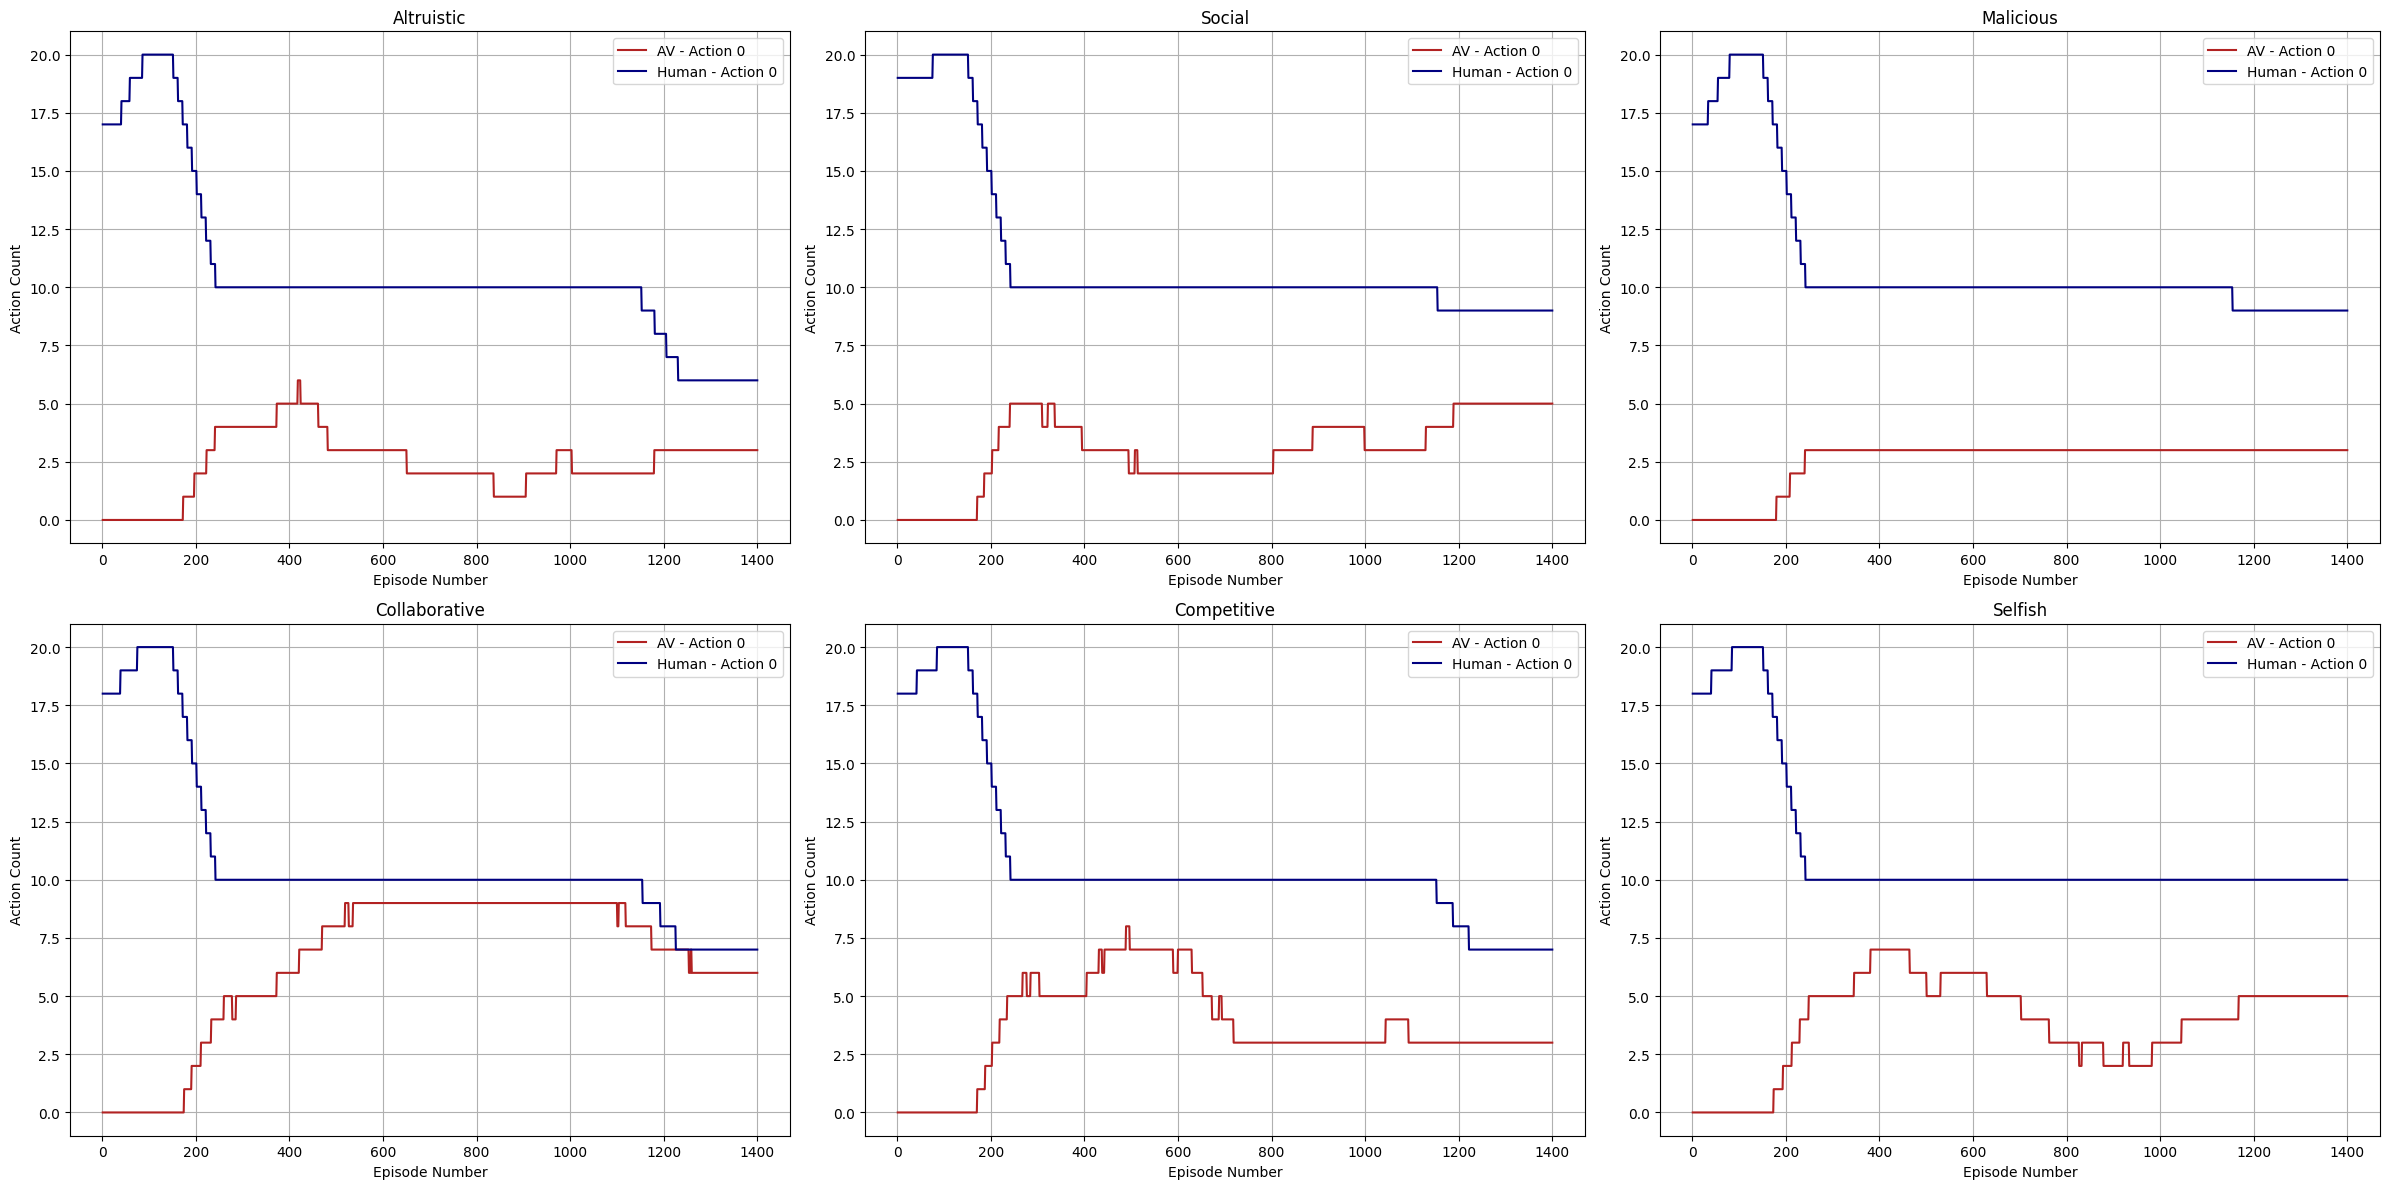

In [12]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot (adjusting to four different line styles)
colors_av = ["firebrick", "firebrick"]  # AV colors for action 0 and 1 (both red)
colors_human = ["navy", "navy"]         # Human colors for action 0 and 1 (both blue)

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure for each folder with 2 rows and 3 columns (side-by-side layout)
fig, axs = plt.subplots(2, 3, figsize=(24, 12))  # 2 rows, 3 columns grid

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name) in enumerate(zip(folder_paths, legend)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and action counts
    episodes = []
    av_action_0_counts = []
    av_action_1_counts = []
    human_action_0_counts = []
    human_action_1_counts = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0 and action 1
        av_action_0_count = (av_df['action'] == 0).sum()
        av_action_1_count = (av_df['action'] == 1).sum()
        av_action_0_counts.append(av_action_0_count)
        av_action_1_counts.append(av_action_1_count)

        # Count the number of Humans choosing action 0 and action 1
        human_action_0_count = (human_df['action'] == 0).sum()
        human_action_1_count = (human_df['action'] == 1).sum()
        human_action_0_counts.append(human_action_0_count)
        human_action_1_counts.append(human_action_1_count)

    ## Transform NaN values to zero
    av_action_0_counts = np.nan_to_num(av_action_0_counts, nan=0).tolist()
    av_action_1_counts = np.nan_to_num(av_action_1_counts, nan=0).tolist()
    human_action_0_counts = np.nan_to_num(human_action_0_counts, nan=0).tolist()
    human_action_1_counts = np.nan_to_num(human_action_1_counts, nan=0).tolist()

    # Smooth the action counts using uniform_filter1d
    av_action_0_counts = uniform_filter1d(av_action_0_counts, size=100)
    av_action_1_counts = uniform_filter1d(av_action_1_counts, size=100)
    human_action_0_counts = uniform_filter1d(human_action_0_counts, size=100)
    human_action_1_counts = uniform_filter1d(human_action_1_counts, size=100)

    # Plot in the appropriate subplot (each folder has its own subplot)
    ax = axs[i]
    
    # Plot the results for both AVs and Humans on the same plot
    # Plot AV actions
    ax.plot(episodes, av_action_0_counts, linestyle='-', color=colors_av[0], label=f'AV - Action 0')  # AV Action 0
    #ax.plot(episodes, av_action_1_counts, linestyle='-', color=colors_av[1], label=f'AV - Action 1')  # AV Action 1
    
    # Plot Human actions
    ax.plot(episodes, human_action_0_counts, linestyle='-', color=colors_human[0], label=f'Human - Action 0')  # Human Action 0
    #ax.plot(episodes, human_action_1_counts, linestyle='-', color=colors_human[1], label=f'Human - Action 1')  # Human Action 1
    
    # Customize the plot for each subplot
    ax.set_xlabel('Episode Number')
    ax.set_ylabel('Action Count')
    ax.set_title(f'{legend_name}')
    ax.grid(True)
    
    # Show legend for the subplot to differentiate AVs and Humans
    ax.legend()

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


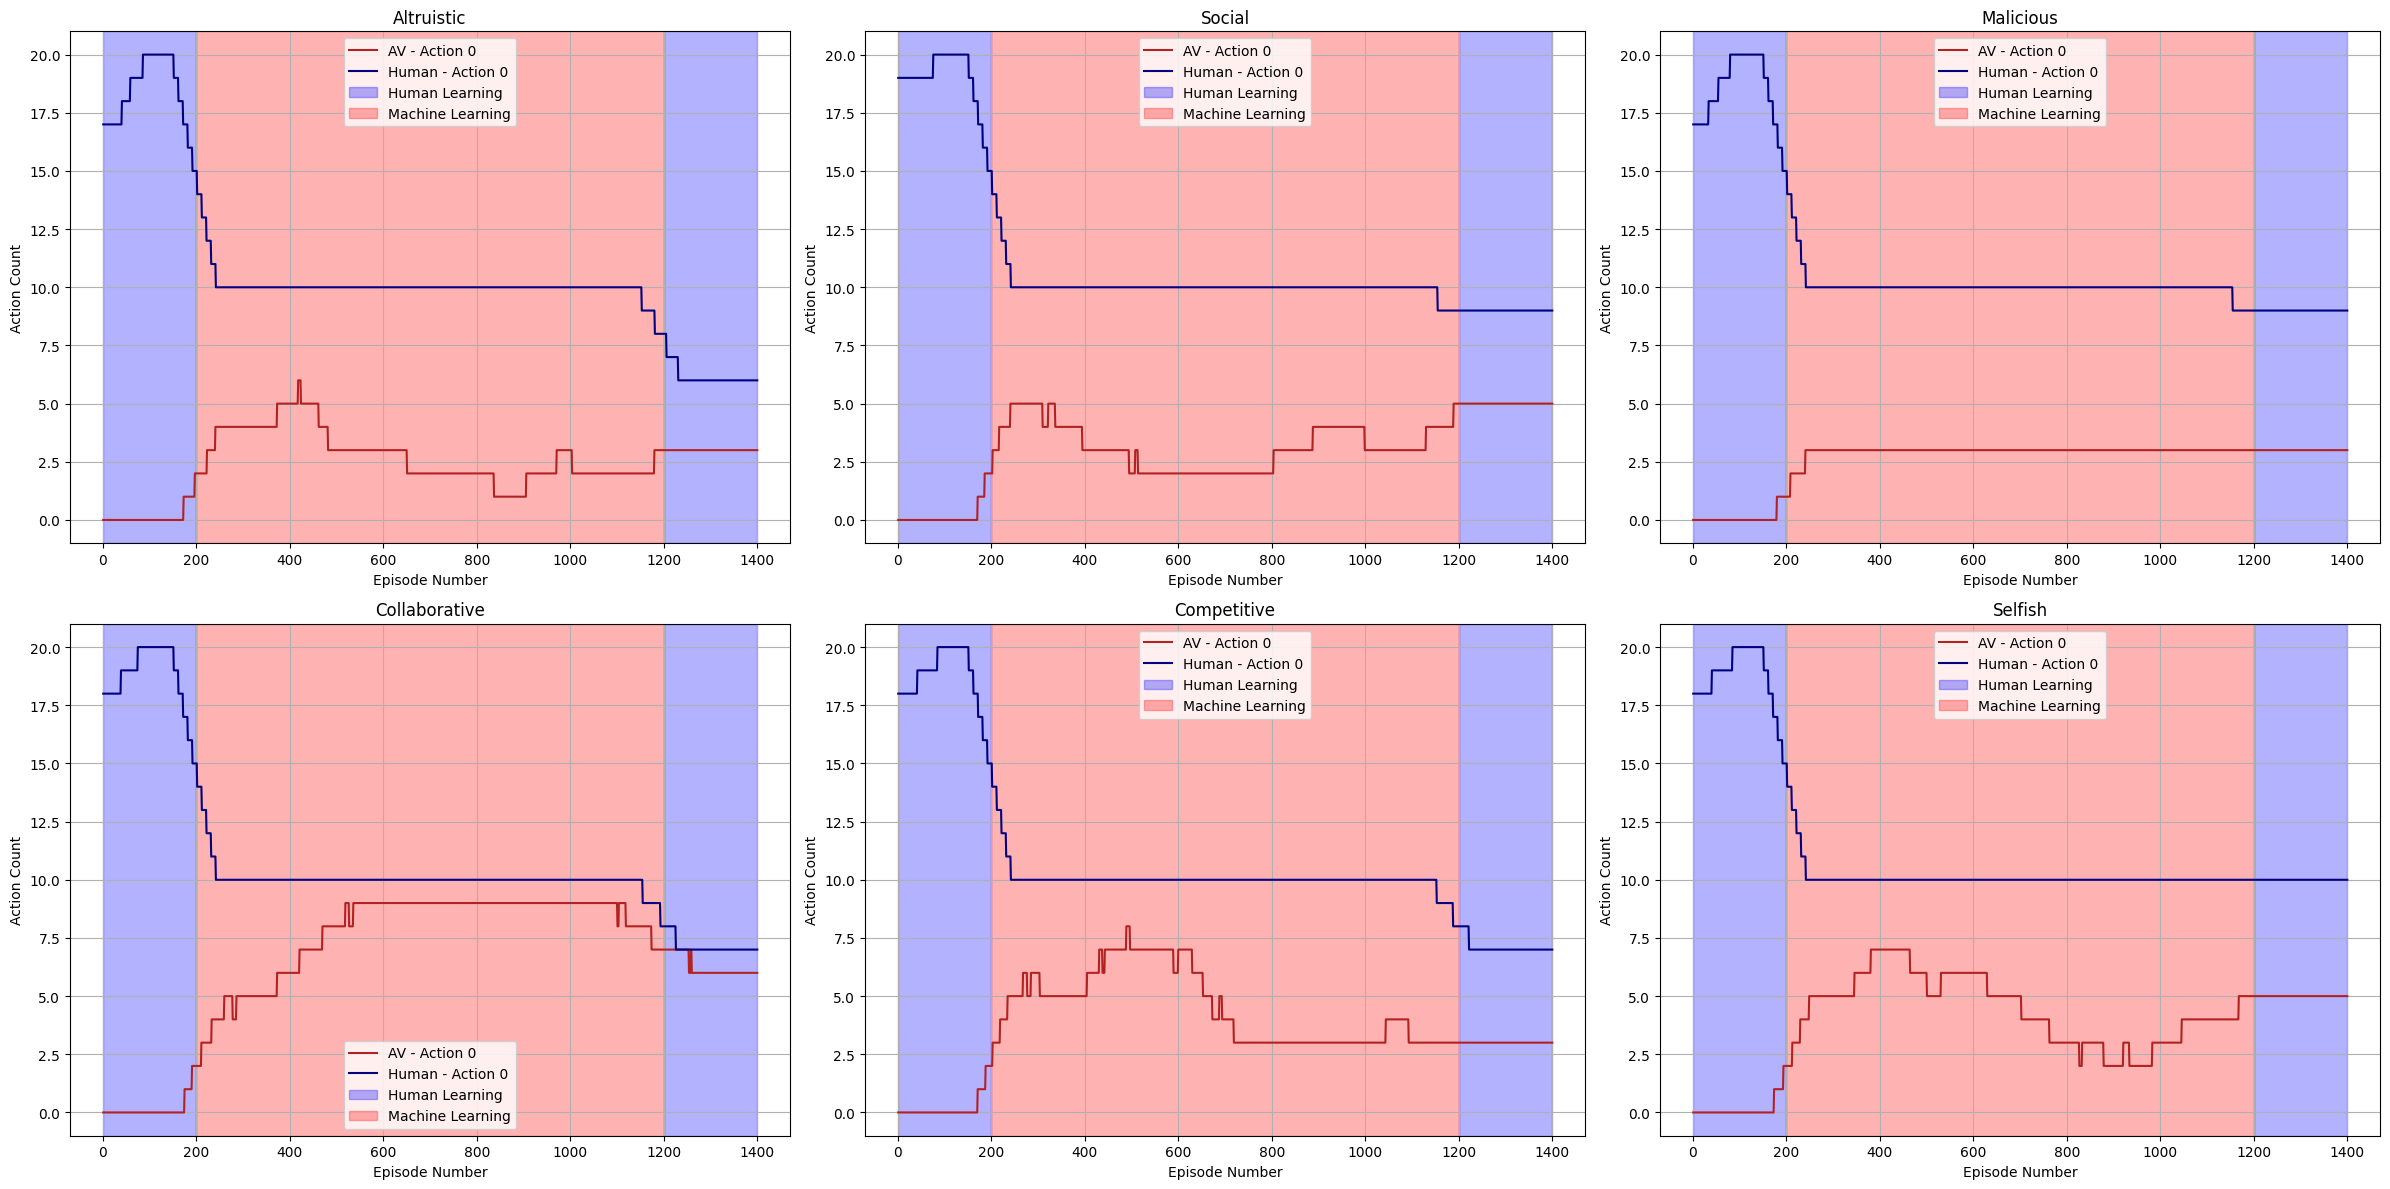

In [19]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot (adjusting to four different line styles)
colors_av = ["firebrick", "firebrick"]  # AV colors for action 0 and 1 (both red)
colors_human = ["navy", "navy"]         # Human colors for action 0 and 1 (both blue)

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure for each folder with 2 rows and 3 columns (side-by-side layout)
fig, axs = plt.subplots(2, 3, figsize=(24, 12))  # 2 rows, 3 columns grid

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name) in enumerate(zip(folder_paths, legend)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and action counts
    episodes = []
    av_action_0_counts = []
    av_action_1_counts = []
    human_action_0_counts = []
    human_action_1_counts = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0 and action 1
        av_action_0_count = (av_df['action'] == 0).sum()
        av_action_1_count = (av_df['action'] == 1).sum()
        av_action_0_counts.append(av_action_0_count)
        av_action_1_counts.append(av_action_1_count)

        # Count the number of Humans choosing action 0 and action 1
        human_action_0_count = (human_df['action'] == 0).sum()
        human_action_1_count = (human_df['action'] == 1).sum()
        human_action_0_counts.append(human_action_0_count)
        human_action_1_counts.append(human_action_1_count)

    ## Transform NaN values to zero
    av_action_0_counts = np.nan_to_num(av_action_0_counts, nan=0).tolist()
    av_action_1_counts = np.nan_to_num(av_action_1_counts, nan=0).tolist()
    human_action_0_counts = np.nan_to_num(human_action_0_counts, nan=0).tolist()
    human_action_1_counts = np.nan_to_num(human_action_1_counts, nan=0).tolist()

    # Smooth the action counts using uniform_filter1d
    av_action_0_counts = uniform_filter1d(av_action_0_counts, size=100)
    av_action_1_counts = uniform_filter1d(av_action_1_counts, size=100)
    human_action_0_counts = uniform_filter1d(human_action_0_counts, size=100)
    human_action_1_counts = uniform_filter1d(human_action_1_counts, size=100)

    # Plot in the appropriate subplot (each folder has its own subplot)
    ax = axs[i]
    
    # Plot the results for both AVs and Humans on the same plot
    # Plot AV actions
    ax.plot(episodes, av_action_0_counts, linestyle='-', color=colors_av[0], label=f'AV - Action 0')  # AV Action 0
    # ax.plot(episodes, av_action_1_counts, linestyle='-', color=colors_av[1], label=f'AV - Action 1')  # AV Action 1
    
    # Plot Human actions
    ax.plot(episodes, human_action_0_counts, linestyle='-', color=colors_human[0], label=f'Human - Action 0')  # Human Action 0
    # ax.plot(episodes, human_action_1_counts, linestyle='-', color=colors_human[1], label=f'Human - Action 1')  # Human Action 1

    # Add background shading for the different learning phases
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again

    # Customize the plot for each subplot
    ax.set_xlabel('Episode Number')
    ax.set_ylabel('Action Count')
    ax.set_title(f'{legend_name}')
    ax.grid(True)
    
    # Show legend for the subplot to differentiate AVs and Humans
    ax.legend()

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes


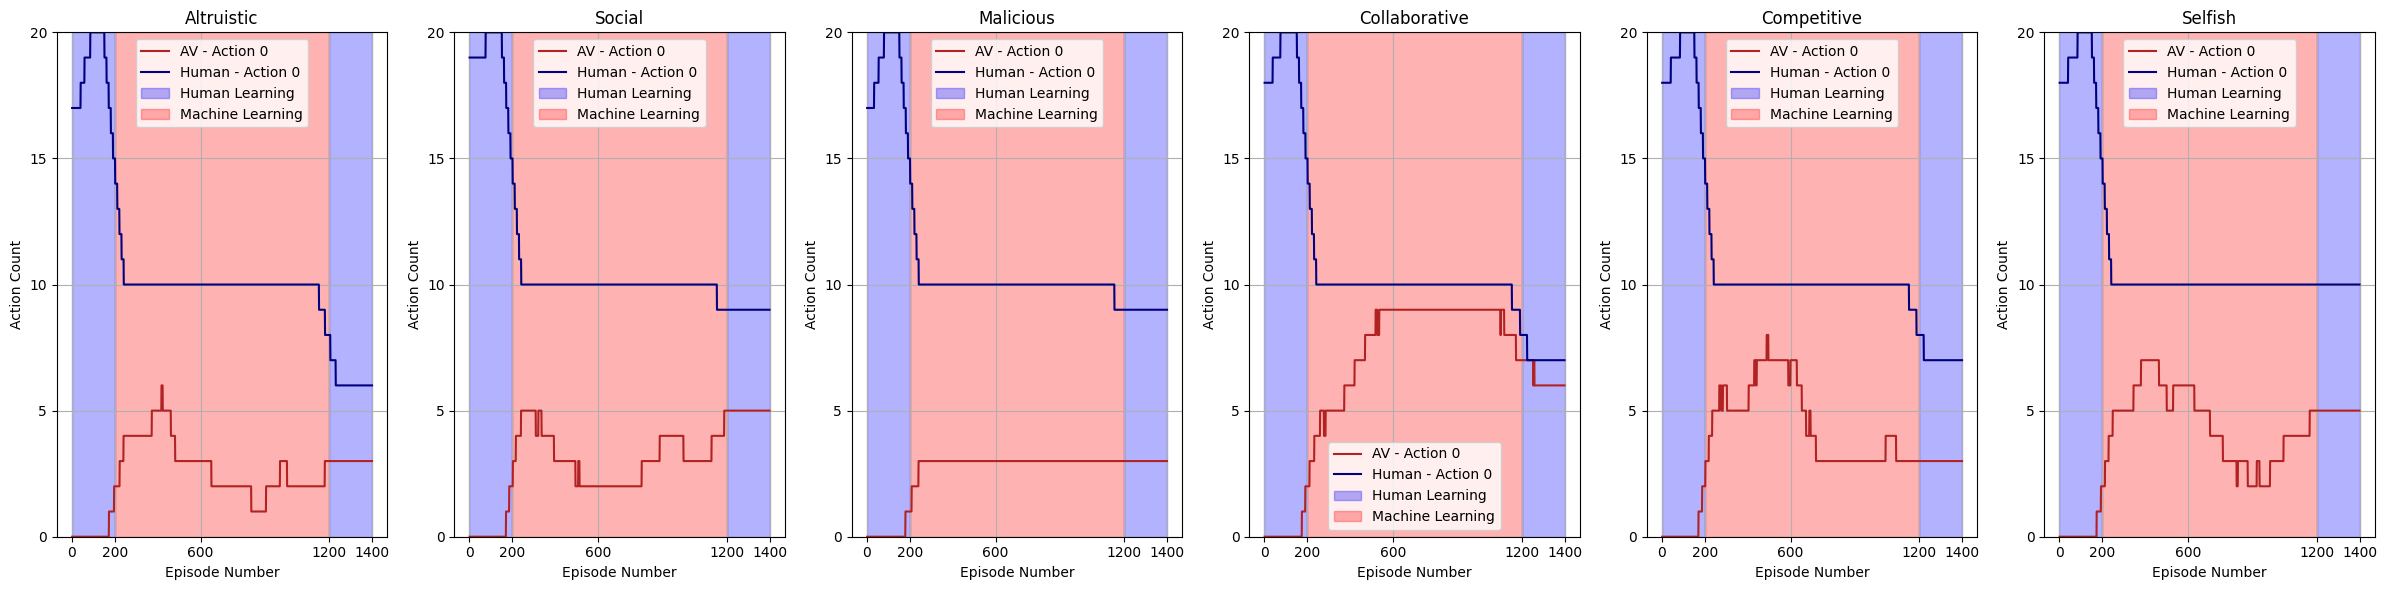

In [23]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Define colors for each plot (adjusting to four different line styles)
colors_av = ["firebrick", "firebrick"]  # AV colors for action 0 and 1 (both red)
colors_human = ["navy", "navy"]         # Human colors for action 0 and 1 (both blue)

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Create a plot figure for each folder with 1 row and 6 columns (side-by-side layout)
fig, axs = plt.subplots(1, 6, figsize=(24, 6))  # 1 row, 6 columns grid

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

# Iterate through all folder paths with corresponding colors
for i, (folder_path, legend_name) in enumerate(zip(folder_paths, legend)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Prepare lists to store episode numbers and action counts
    episodes = []
    av_action_0_counts = []
    av_action_1_counts = []
    human_action_0_counts = []
    human_action_1_counts = []

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        episodes.append(episode_number)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0 and action 1
        av_action_0_count = (av_df['action'] == 0).sum()
        av_action_1_count = (av_df['action'] == 1).sum()
        av_action_0_counts.append(av_action_0_count)
        av_action_1_counts.append(av_action_1_count)

        # Count the number of Humans choosing action 0 and action 1
        human_action_0_count = (human_df['action'] == 0).sum()
        human_action_1_count = (human_df['action'] == 1).sum()
        human_action_0_counts.append(human_action_0_count)
        human_action_1_counts.append(human_action_1_count)

    ## Transform NaN values to zero
    av_action_0_counts = np.nan_to_num(av_action_0_counts, nan=0).tolist()
    av_action_1_counts = np.nan_to_num(av_action_1_counts, nan=0).tolist()
    human_action_0_counts = np.nan_to_num(human_action_0_counts, nan=0).tolist()
    human_action_1_counts = np.nan_to_num(human_action_1_counts, nan=0).tolist()

    # Smooth the action counts using uniform_filter1d
    av_action_0_counts = uniform_filter1d(av_action_0_counts, size=100)
    av_action_1_counts = uniform_filter1d(av_action_1_counts, size=100)
    human_action_0_counts = uniform_filter1d(human_action_0_counts, size=100)
    human_action_1_counts = uniform_filter1d(human_action_1_counts, size=100)

    # Plot in the appropriate subplot (each folder has its own subplot)
    ax = axs[i]
    
    # Plot the results for both AVs and Humans on the same plot
    # Plot AV actions
    ax.plot(episodes, av_action_0_counts, linestyle='-', color=colors_av[0], label=f'AV - Action 0')  # AV Action 0
    # ax.plot(episodes, av_action_1_counts, linestyle='-', color=colors_av[1], label=f'AV - Action 1')  # AV Action 1
    
    # Plot Human actions
    ax.plot(episodes, human_action_0_counts, linestyle='-', color=colors_human[0], label=f'Human - Action 0')  # Human Action 0
    # ax.plot(episodes, human_action_1_counts, linestyle='-', color=colors_human[1], label=f'Human - Action 1')  # Human Action 1

    # Add background shading for the different learning phases
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again

    # Set y-axis limits and y-ticks
    ax.set_ylim([0, 20])  # Adjust the y-axis to a smaller range
    ax.set_yticks([0, 5, 10, 15, 20])  # Include ticks at 0, 10, 20

    # Set x-ticks and make sure 200 and 1200 are included
    ax.set_xticks([0, 200, 600, 1200, 1400])  # Add 200 and 1200 as part of the x-ticks

    # Customize the plot for each subplot
    ax.set_xlabel('Episode Number')
    ax.set_ylabel('Action Count')
    ax.set_title(f'{legend_name}')
    ax.grid(True)
    
    # Show legend for the subplot to differentiate AVs and Humans
    ax.legend()

# Automatically adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define original and additional folder paths
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

# Add six more folder paths
additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine folder paths
folder_paths = folder_paths + additional_folder_paths

# Define colors for AV and Human actions
colors_av = "firebrick"  # AV color
colors_human = "navy"    # Human color

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths (including additional ones)
for i, (folder_path, legend_name) in enumerate(zip(folder_paths, legend)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0
        av_action_0_count = (av_df['action'] == 0).sum()

        # Count the number of Humans choosing action 0
        human_action_0_count = (human_df['action'] == 0).sum()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Action Count': av_action_0_count,
            'Kind': 'AV - Action 0',
            'Scenario': legend_name
        })
        all_data.append({
            'Episode': episode_number,
            'Action Count': human_action_0_count,
            'Kind': 'Human - Action 0',
            'Scenario': legend_name
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the action counts using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        data.loc[mask, 'Action Count'] = uniform_filter1d(data.loc[mask, 'Action Count'], size=100)

# Create a FacetGrid with seaborn to plot different scenarios in columns, 6 plots per row
g = sns.FacetGrid(data, col="Scenario", hue="Kind", height=2.5, aspect=1.2, col_wrap=6, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Action Count").add_legend()

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    # Set y-ticks and x-ticks
    ax.set_yticks([0, 10, 20])
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Action Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes
Processing folder: training_records/dqn_new1_1quarternet_20agents/episodes


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'training_records/dqn_new1_1quarternet_20agents/episodes'

Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes
Processing folder: training_records/dqn_altruistic_halfnet_20agents/episodes
Processing folder: training_records/dqn_social_halfnet_20agents/episodes
Processing folder: training_records/dqn_malicious_halfnet_20agents/episodes
Processing folder: training_records/dqn_collaborative_halfnet_20agents/episodes
Processing folder: training_records/dqn_competitive_halfnet_20agents/episodes
Processing folder: training_records/dqn_selfish_halfnet_20agents/episodes


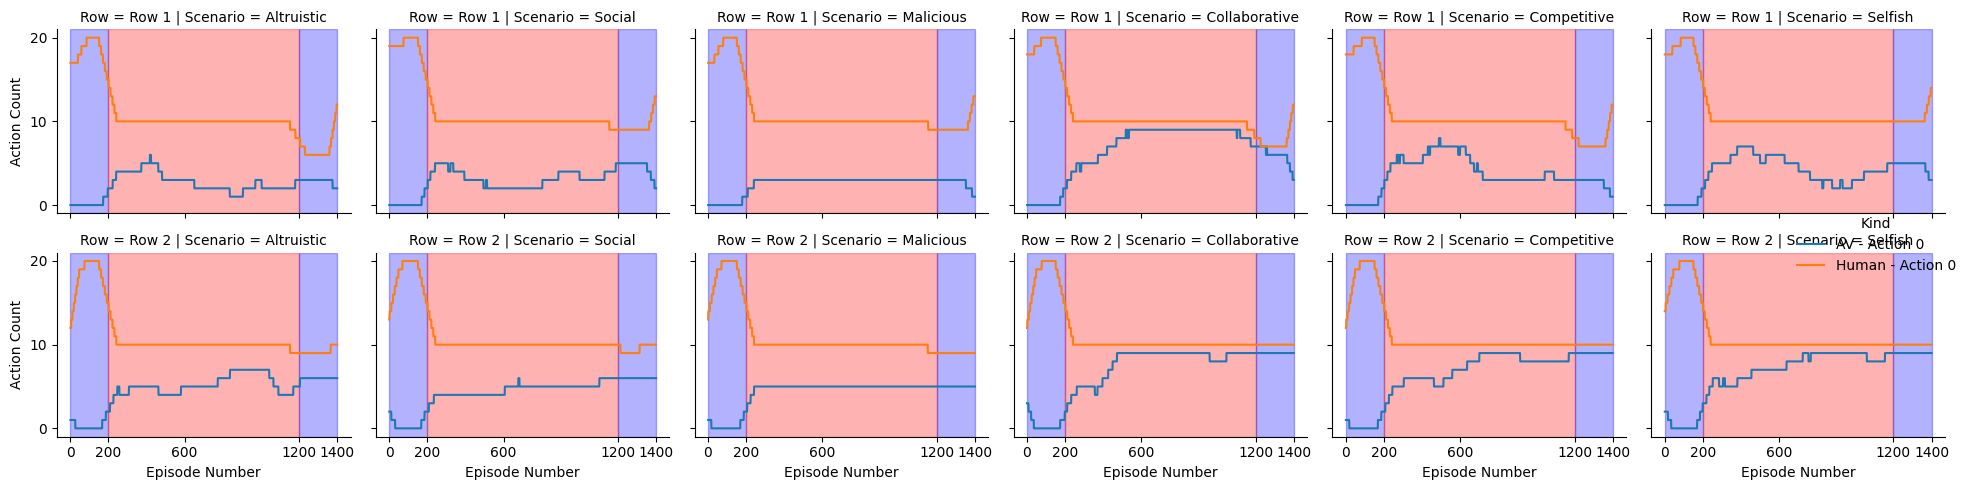

In [30]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define original and additional folder paths
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

# Add six more folder paths
additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine folder paths and assign row labels
folder_paths = folder_paths + additional_folder_paths
legend = legend
row_labels = ['Row 1'] * 6 + ['Row 2'] * 6  # 6 plots in the first row, 6 in the second row

# Define colors for AV and Human actions
colors_av = "firebrick"  # AV color
colors_human = "navy"    # Human color

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths (including additional ones)
for i, (folder_path, legend_name, row_label) in enumerate(zip(folder_paths, legend, row_labels)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0
        av_action_0_count = (av_df['action'] == 0).sum()

        # Count the number of Humans choosing action 0
        human_action_0_count = (human_df['action'] == 0).sum()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Action Count': av_action_0_count,
            'Kind': 'AV - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })
        all_data.append({
            'Episode': episode_number,
            'Action Count': human_action_0_count,
            'Kind': 'Human - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the action counts using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        data.loc[mask, 'Action Count'] = uniform_filter1d(data.loc[mask, 'Action Count'], size=100)

# Create a FacetGrid with seaborn to plot different scenarios in columns and rows
g = sns.FacetGrid(data, col="Scenario", hue="Kind", row="Row", height=2.5, aspect=1.2, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Action Count").add_legend()

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    # Set y-ticks and x-ticks
    ax.set_yticks([0, 10, 20])
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Action Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define original and additional folder paths
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

# Add six more folder paths
additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine folder paths and assign row labels
folder_paths = folder_paths + additional_folder_paths
legend = legend
row_labels = ['Row 1'] * 6 + ['Row 2'] * 6  # 6 plots in the first row, 6 in the second row

# Define colors for AV and Human actions
colors_av = "firebrick"  # AV color
colors_human = "navy"    # Human color

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths (including additional ones)
for i, (folder_path, legend_name, row_label) in enumerate(zip(folder_paths, legend, row_labels)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0
        av_action_0_count = (av_df['action'] == 0).sum()

        # Count the number of Humans choosing action 0
        human_action_0_count = (human_df['action'] == 0).sum()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Action Count': av_action_0_count,
            'Kind': 'AV - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })
        all_data.append({
            'Episode': episode_number,
            'Action Count': human_action_0_count,
            'Kind': 'Human - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the action counts using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        data.loc[mask, 'Action Count'] = uniform_filter1d(data.loc[mask, 'Action Count'], size=100)

# Create a FacetGrid with seaborn to plot different scenarios in columns and rows
g = sns.FacetGrid(data, col="Scenario", hue="Kind", row="Row", height=2.5, aspect=1.2, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Action Count").add_legend()

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    # Set y-ticks and x-ticks
    ax.set_yticks([0, 10, 20])
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Action Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Processing folder: training_records/dqn_altruistic_1quarternet_20agents/episodes
Processing folder: training_records/dqn_social_1quarternet_20agents/episodes
Processing folder: training_records/dqn_malicious_1quarternet_20agents/episodes
Processing folder: training_records/dqn_collaborative_1quarternet_20agents/episodes
Processing folder: training_records/dqn_competitive_1quarternet_20agents/episodes
Processing folder: training_records/dqn_selfish_1quarternet_20agents/episodes
Processing folder: training_records/dqn_altruistic_halfnet_20agents/episodes
Processing folder: training_records/dqn_social_halfnet_20agents/episodes
Processing folder: training_records/dqn_malicious_halfnet_20agents/episodes
Processing folder: training_records/dqn_collaborative_halfnet_20agents/episodes
Processing folder: training_records/dqn_competitive_halfnet_20agents/episodes
Processing folder: training_records/dqn_selfish_halfnet_20agents/episodes
Processing folder: training_records/dqn_altruistic_3quartern

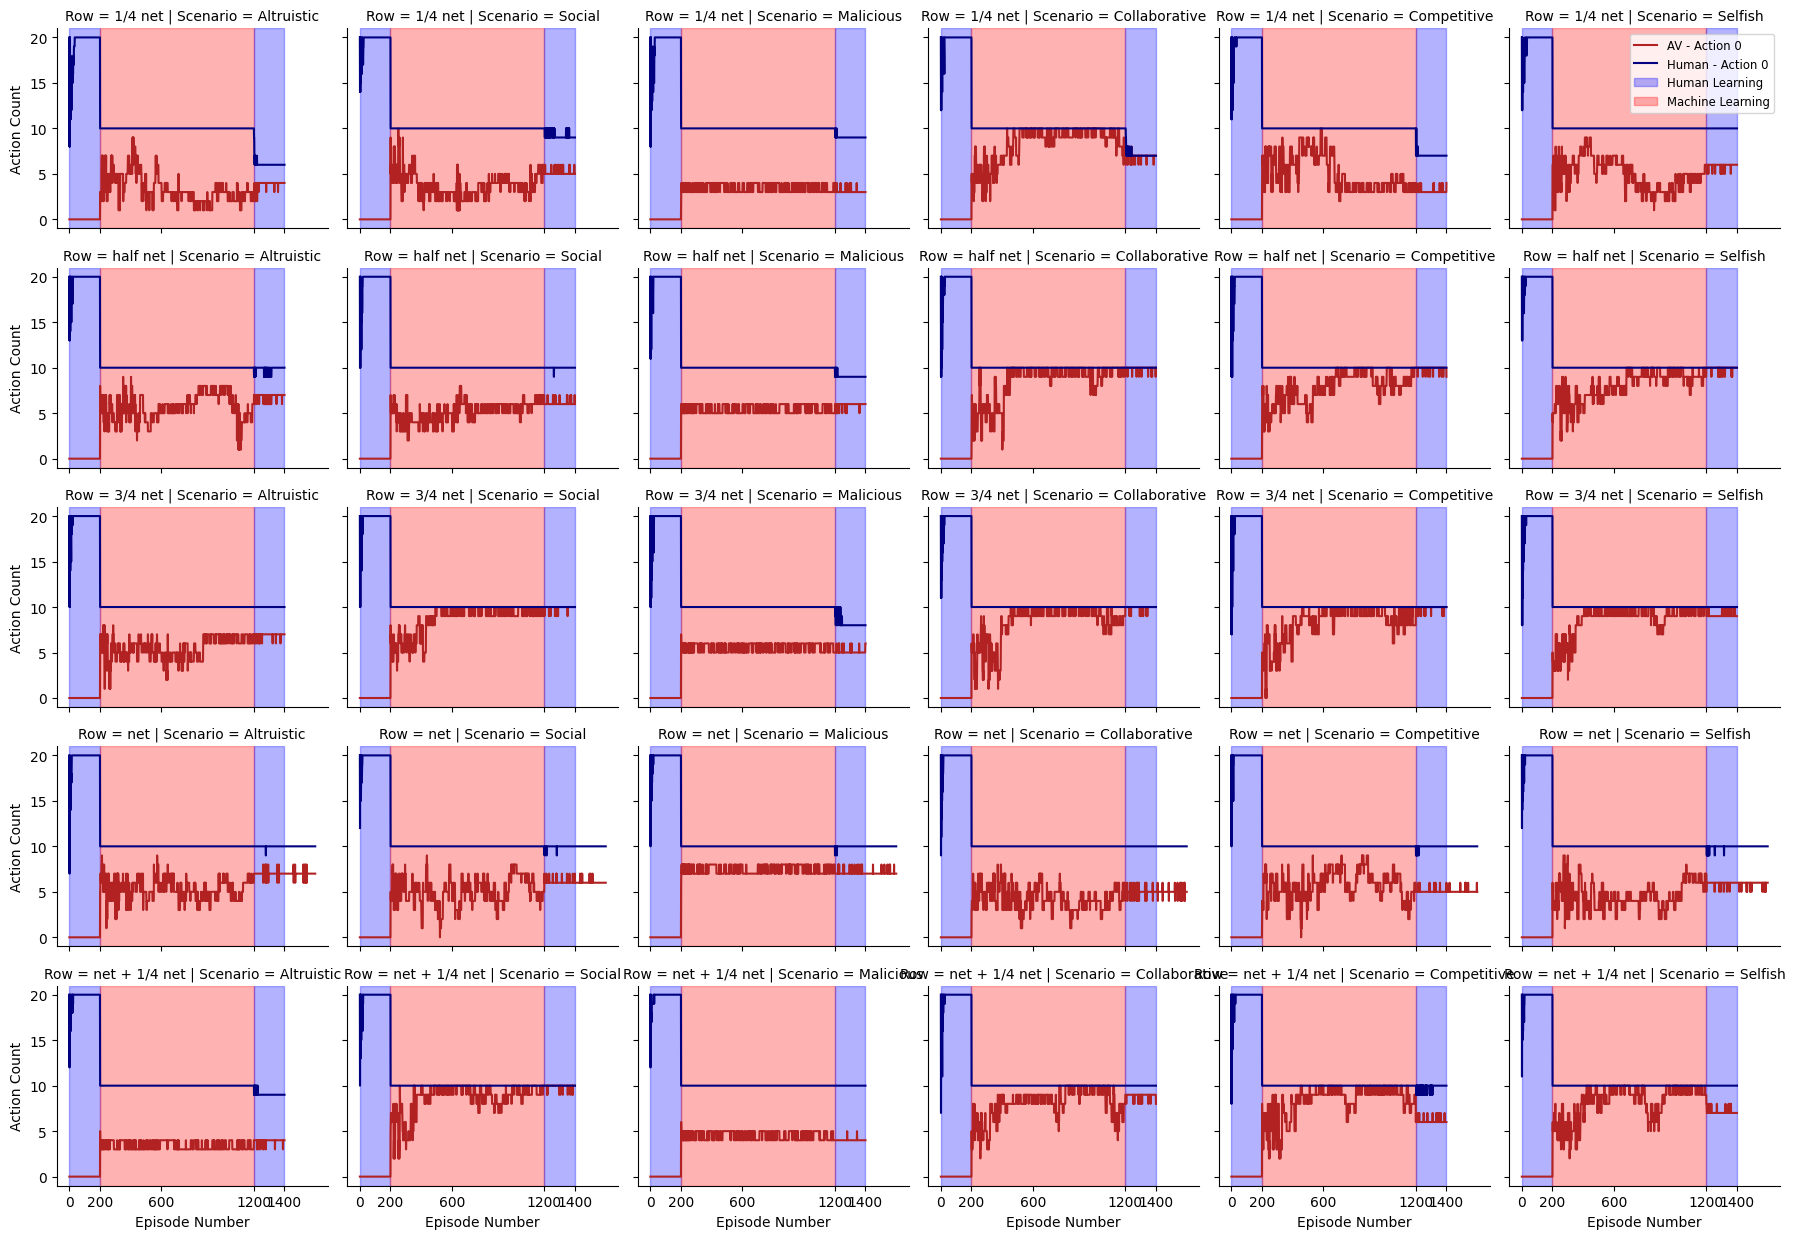

In [40]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

# Define folder paths (first row) and additional folder paths (second row)
folder_paths = ['training_records/dqn_altruistic_1quarternet_20agents/episodes', 
                'training_records/dqn_social_1quarternet_20agents/episodes',
                'training_records/dqn_malicious_1quarternet_20agents/episodes',
                'training_records/dqn_collaborative_1quarternet_20agents/episodes',
                'training_records/dqn_competitive_1quarternet_20agents/episodes',
                'training_records/dqn_selfish_1quarternet_20agents/episodes']

additional_folder_paths = [
                'training_records/dqn_altruistic_halfnet_20agents/episodes',
                'training_records/dqn_social_halfnet_20agents/episodes',
                'training_records/dqn_malicious_halfnet_20agents/episodes',
                'training_records/dqn_collaborative_halfnet_20agents/episodes',
                'training_records/dqn_competitive_halfnet_20agents/episodes',
                'training_records/dqn_selfish_halfnet_20agents/episodes',
                'training_records/dqn_altruistic_3quarternet_20agents/episodes',
                'training_records/dqn_social_3quarternet_20agents/episodes',
                'training_records/dqn_malicious_3quarternet_20agents/episodes',
                'training_records/dqn_collaborative_3quarternet_20agents/episodes',
                'training_records/dqn_competitive_3quarternet_20agents/episodes',
                'training_records/dqn_selfish_3quarternet_20agents/episodes',
                'training_records/dqn_altruistic_net_20agents/episodes',
                'training_records/dqn_social_net_20agents/episodes',
                'training_records/dqn_malicious_net_20agents/episodes',
                'training_records/dqn_collaborative_net_20agents/episodes',
                'training_records/dqn_competitive_net_20agents/episodes',
                'training_records/dqn_selfish_net_20agents/episodes',
                'training_records/dqn_altruistic_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_social_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_malicious_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_collaborative_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_competitive_1quarterbiggernet_20agents/episodes',
                'training_records/dqn_selfish_1quarterbiggernet_20agents/episodes']

# Update legends for additional folders
legend = ['Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish',  
          'Altruistic', 'Social', 'Malicious', 'Collaborative', 'Competitive', 'Selfish']

# Combine the folder paths and their legends
all_folder_paths = folder_paths + additional_folder_paths
all_legends = legend

# Assign row labels (first 6 for row 1, the rest for row 2)
row_labels = ['1/4 net'] * len(folder_paths) + ['half net'] * 6 + ['3/4 net'] * 6 + ['net'] * 6 + ['net + 1/4 net'] * 6

# Function to extract the numeric part from file names
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Prepare an empty list to store the data for all folders
all_data = []

# Iterate through all folder paths and their corresponding row labels
for i, (folder_path, legend_name, row_label) in enumerate(zip(all_folder_paths, all_legends, row_labels)):
    print(f"Processing folder: {folder_path}")
    
    # List all CSV files in the current folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Sort files based on the numeric part of their names
    files.sort(key=extract_number)

    # Iterate through all sorted CSV files in the current folder
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract episode number from the file name
        episode_number = extract_number(file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Filter for AV and Human rows
        av_df = df[df['kind'] == 'AV']
        human_df = df[df['kind'] == 'Human']

        # Count the number of AVs choosing action 0
        av_action_0_count = (av_df['action'] == 0).sum()

        # Count the number of Humans choosing action 0
        human_action_0_count = (human_df['action'] == 0).sum()

        # Append the data to the all_data list
        all_data.append({
            'Episode': episode_number,
            'Action Count': av_action_0_count,
            'Kind': 'AV - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })
        all_data.append({
            'Episode': episode_number,
            'Action Count': human_action_0_count,
            'Kind': 'Human - Action 0',
            'Scenario': legend_name,
            'Row': row_label  # This will distinguish between Row 1 and Row 2
        })

# Convert the list into a pandas DataFrame
data = pd.DataFrame(all_data)

# Smooth the action counts using uniform_filter1d for each combination of kind and scenario
for kind in data['Kind'].unique():
    for scenario in data['Scenario'].unique():
        mask = (data['Kind'] == kind) & (data['Scenario'] == scenario)
        #data.loc[mask, 'Action Count'] = uniform_filter1d(data.loc[mask, 'Action Count'], size=100)

# Create a FacetGrid with seaborn to plot different scenarios in columns and rows
g = sns.FacetGrid(data, col="Scenario", hue="Kind", row="Row", height=2.5, aspect=1.2, sharey=True, sharex=True)

# Map the lineplot to each facet
g.map(sns.lineplot, "Episode", "Action Count")

# Set the first line to red (AV) and the second to blue (Human)
for ax in g.axes.flat:
    ax.lines[0].set_color("firebrick")  # First line for 'AV'
    ax.lines[1].set_color("navy")       # Second line for 'Human'

# Add background shading for the different learning phases in each plot
for ax in g.axes.flat:
    ax.axvspan(0, 200, color='blue', alpha=0.3, label='Human Learning')          # Shade 0-200 for human learning
    ax.axvspan(200, 1200, color='red', alpha=0.3, label='Machine Learning')    # Shade 200-1200 for machine learning
    ax.axvspan(1200, 1400, color='blue', alpha=0.3)                              # Shade 1200-1400 for human learning again
    
    # Set y-ticks and x-ticks
    ax.set_yticks([0, 5, 10, 15, 20])
    ax.set_xticks([0, 200, 600, 1200, 1400])

# Set the axis labels
g.set_axis_labels('Episode Number', 'Action Count')

# Add a legend to the top-right plot of the first row
# Find the axis for the last plot in the first row (rightmost)
rightmost_ax_first_row = g.axes[0, -1]

# Manually add the legend to this specific axis
rightmost_ax_first_row.legend(loc='upper right', fontsize='small', frameon=True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
